# Amazon Sales Report Analysis EDA Project
### Design and Drafted by : Data Analyst ALTAF HUSAIN

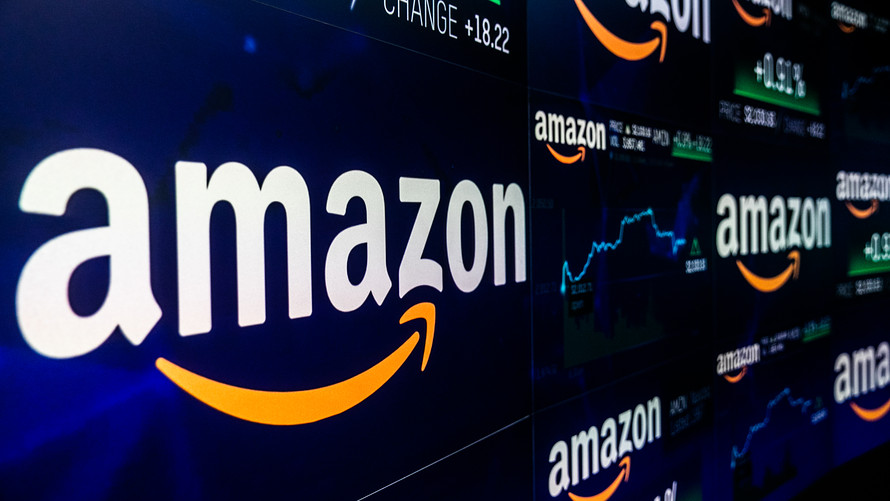

In [ ]:
import IPython
IPython.display.Image( "https://3dtrixs.com/wp-content/uploads/2024/09/MW-HD113_Amazon_20190131200130_ZH.jpg")

# Detailed Report Objective :
The objective of this report is to analyze Amazon sales data across multiple dimensions to support the sales team in making effective, data-driven decisions. The analysis focuses on both quantitative factors (such as order volume, sales amount, and product quantities) and qualitative factors (such as order status, fulfillment type, shipping service level, and courier performance).

# This report aims to:

- Identify sales trends over time to assist in demand forecasting and promotional planning.

- Evaluate category-wise and region-wise performance to uncover growth opportunities and underperforming areas.

- Compare B2B and B2C transactions for strategic segmentation.

- Assess the impact of fulfillment methods and courier statuses on order delivery and customer satisfaction.

- Highlight any data quality issues or missing values that could affect analysis accuracy.

- Support the sales team in making informed decisions by transforming raw transactional data into actionable insights.

# Step 1 :- Importing Libraries or Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings('ignore')
print("module imported successfully")

module imported successfully


# Step 2 :- Load CSV File

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Amazon sales data/Amazon Sale Report.csv'
df = pd.read_csv(file_path)
print('done')

done


# Step 3 :- View DataFrame

In [ ]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [ ]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


# Step 4 : - DataFrame info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

# Step 5 :- Check Rows and Columns

In [ ]:
rows ,cols = df.shape
print(f'''This dataset contains :
Rows:{rows}
Columns:{cols} ''')

This dataset contains :
Rows:128976
Columns:21 


# Step 6 :- Data Cleaning

In [ ]:
# Drop index column:
new_df = df.drop('index',axis=1)
print('done')

done


In [ ]:
new_df.duplicated('Order ID').value_counts()

,count
False,120229
True,8747


In [ ]:
# Duplicate Percentage
duplicate_df = new_df[new_df.duplicated('Order ID')]
print('done')

done


In [ ]:
duplicate_per = round((len(duplicate_df)/len(df)) * 100,2)
print(f'''Data contains : {duplicate_per} % Duplicate Data''')
print(f'''Data contains : {100 - duplicate_per} % Proper Data''')

Data contains : 6.78 % Duplicate Data
Data contains : 93.22 % Proper Data


In [ ]:
# Because only 6.78% Duplicate Data , so we can drop it

In [ ]:
duplicate_free_df = new_df.drop_duplicates('Order ID')
print('done')

done


In [ ]:
# Check Missing Values/NAN data
duplicate_free_df.isna().mean().sort_values(ascending = False) * 100

,0
New,100.000000
PendingS,100.000000
fulfilled-by,69.788487
currency,6.150762
Amount,6.150762
ship-city,0.023289
ship-postal-code,0.023289
ship-country,0.023289
ship-state,0.023289
Status,0.000000


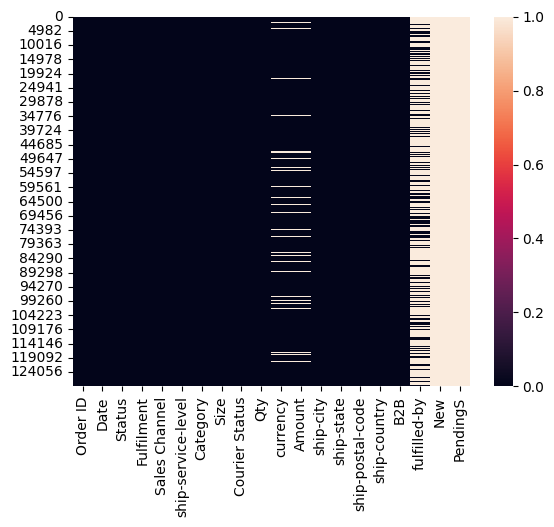

In [ ]:
sns.heatmap(duplicate_free_df.isna())
plt.show()

In [ ]:
# Pendings, New, fulfilled-by columns contains 50% or more missing data, so we can drop it,and drop missing rows as well
# beacuse it's only 6 to 7% of total data

In [ ]:
# Drop Missing Values/NAN data
duplicate_free_df.drop(['PendingS','New','fulfilled-by'],axis = 1,inplace = True)
print('done')

done


In [ ]:
duplicate_free_df.dropna(inplace = True)
print('done')

done


In [ ]:
duplicate_free_df.isna().mean().sort_values(ascending = False) * 100

,0
Order ID,0.0
Date,0.0
Status,0.0
Fulfilment,0.0
Sales Channel,0.0
ship-service-level,0.0
Category,0.0
Size,0.0
Courier Status,0.0
Qty,0.0


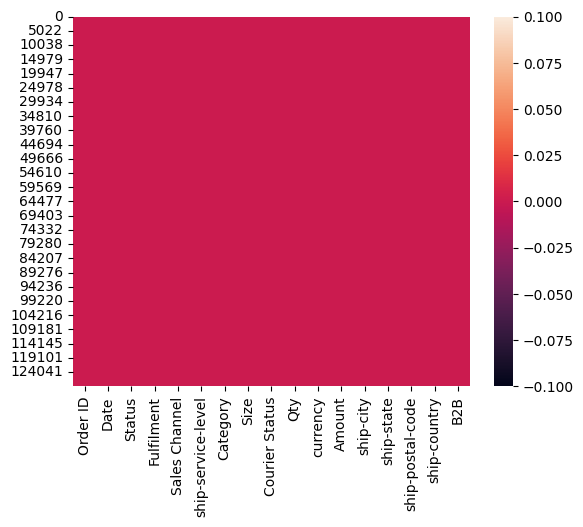

In [ ]:
sns.heatmap(duplicate_free_df.isna())
plt.show()

In [ ]:
# checking Rows , cols
rows ,cols = duplicate_free_df.shape
print(f'''This dataset contains :
Rows:{rows}
Columns:{cols} ''')

This dataset contains :
Rows:112808
Columns:17 


In [ ]:
# create copy of duplicate_free_df
final_df = duplicate_free_df.copy()
print('done')

done


In [ ]:
# check all columns
final_df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

# Step 7 :- Analysis on Final DataFrame

###  univariate, *Bivariate* and Multivariate data and its analysis

## 7.1 :- Univariate Analysis

In [ ]:
final_df['Order ID'].value_counts()

,count
Order ID,
408-7436540-8728312,1
405-8078784-5731545,1
171-9198151-1101146,1
404-0687676-7273146,1
403-9615377-8133951,1
...,...
408-7955685-3083534,1
405-5513694-8146768,1
171-4638481-6326716,1


In [ ]:
final_df['Date'].value_counts()

,count
Date,
05-03-2022,1799
05-02-2022,1769
05-04-2022,1753
04-14-22,1652
04-20-22,1613
...,...
06-23-22,929
06-25-22,915
06-24-22,888


In [ ]:
# Date column is not in date format

In [ ]:
final_df['Date'].dtypes
# o : means :- object(textual) data type

dtype('O')

In [ ]:
final_df['Date'] = pd.to_datetime(final_df['Date'])
print('done')

done


In [ ]:
final_df['Date'].dtypes

dtype('<M8[ns]')

In [ ]:
final_df['Date'].value_counts()

,count
Date,
2022-05-03,1799
2022-05-02,1769
2022-05-04,1753
2022-04-14,1652
2022-04-20,1613
...,...
2022-06-23,929
2022-06-25,915
2022-06-24,888


In [ ]:
final_df['Date'].min()

Timestamp('2022-03-31 00:00:00')

In [ ]:
final_df['Date'].max()

Timestamp('2022-06-29 00:00:00')

In [ ]:
final_df['Status'].value_counts()

,count
Status,
Shipped,72569
Shipped - Delivered to Buyer,26510
Cancelled,9942
Shipped - Returned to Seller,1846
Shipped - Picked Up,918
Pending,583
Pending - Waiting for Pick Up,262
Shipped - Returning to Seller,130
Shipped - Out for Delivery,32


In [ ]:
# final_df['Status'].value_counts().plot(kind = 'bar')
# plt.show()

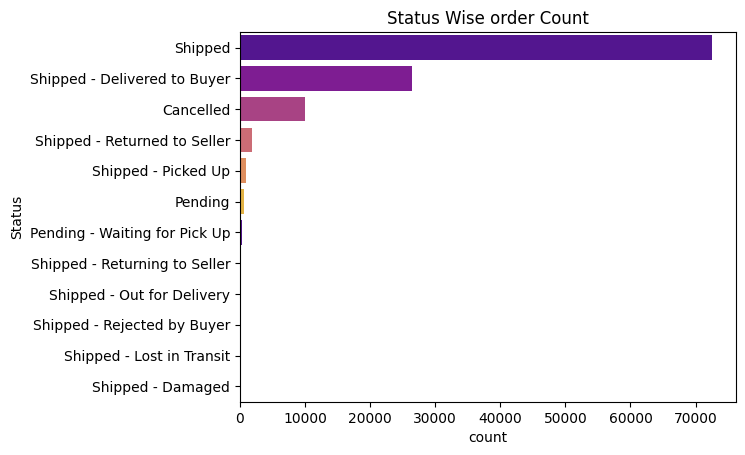

In [ ]:
order = final_df['Status'].value_counts().index
sns.countplot(data = final_df, y = 'Status',
              palette = sns.color_palette('plasma'),
              orient = 'h',order = order)
plt.title('Status Wise order Count')
plt.show()

In [ ]:
# Shipped has more order count data than different shipment status

In [ ]:
# Desigh and Drafted by :ALTAF HUSAIN

In [ ]:
final_df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

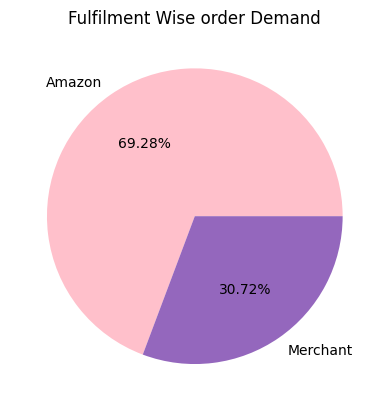

In [ ]:
final_df['Fulfilment'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',colors = [ 'pink', '#9467bd'])
plt.ylabel('')
plt.title('Fulfilment Wise order Demand')
plt.show()

In [ ]:
# Amazon almost contributes approx 70% of overall fulfilment demands than merchant which is approx 30%

In [ ]:
final_df['Sales Channel'].value_counts()

,count
Sales Channel,
Amazon.in,112808


In [ ]:
final_df['ship-service-level'].value_counts()


,count
ship-service-level,
Expedited,77237
Standard,35571


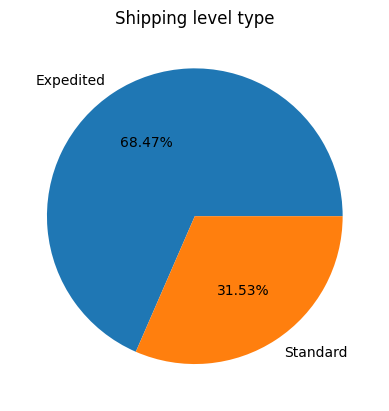

In [ ]:
final_df['ship-service-level'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',color = 'magma')
plt.title('Shipping level type')
plt.ylabel('')
plt.show()

In [ ]:
# expedidet almost contributes approx 69% of overall ship-service-level than standard which is approx 31% it shows more demand are on premium side

In [ ]:
final_df['Category'].value_counts()

,count
Category,
T-shirt,44043
Shirt,42874
Blazzer,13937
Trousers,9570
Perfume,1017
Wallet,846
Socks,386
Shoes,134
Watch,1


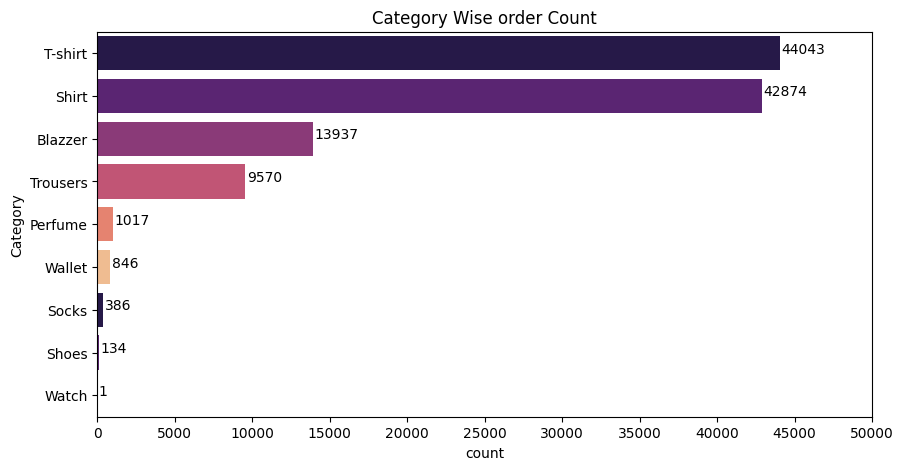

In [ ]:
order = final_df['Category'].value_counts().index
plt.figure(figsize=(10,5))

ax = sns.countplot(data = final_df,
              y = 'Category',
              palette = sns.color_palette('magma'),
              order = order)

for i,j in final_df['Category'].value_counts().items():
  plt.annotate(text= j,xy =(j,i),xytext=(j + 100,i))

plt.title('Category Wise order Count')
plt.xticks(range(0,55000,5000))
plt.show()

In [ ]:
# T-shirt , shirt and blezzar ,are much in order count which is much more than rest categories of product

In [ ]:
final_df['Size'].value_counts()

,count
Size,
M,19725
L,19066
XL,18143
XXL,15592
S,14642
3XL,12716
XS,9417
Free,1998
6XL,643


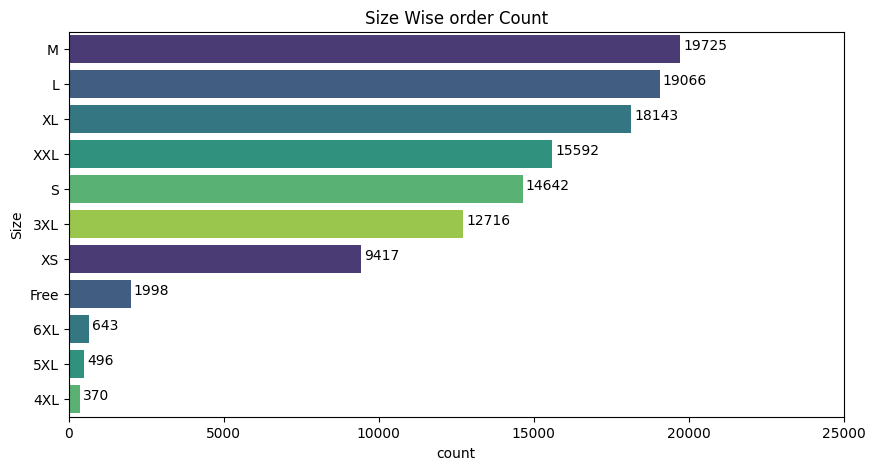

In [ ]:
order = final_df['Size'].value_counts().index
plt.figure(figsize=(10,5))

ax = sns.countplot(data = final_df,
              y = 'Size',
              palette = sns.color_palette('viridis'),
              order = order)

for i,j in final_df['Size'].value_counts().items():
  plt.annotate(text= j,xy =(j,i),xytext=(j + 100,i))

plt.title('Size Wise order Count')
plt.xticks(range(0,30000,5000))
plt.show()

In [ ]:
# M, L, XL, XXL demand are on higher side than rest different size of product or clothes

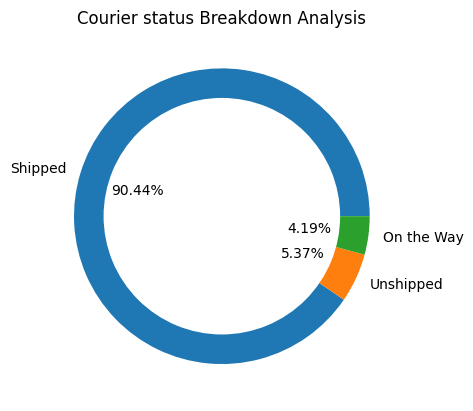

In [ ]:
final_df['Courier Status'].value_counts().plot(kind = 'pie',autopct = '%.2f%%')
plt.pie((1,),radius = 0.8,colors = 'w')
plt.title('Courier status Breakdown Analysis')
plt.ylabel('')
plt.show()

In [ ]:
# Almost 90% data or orders ar eon shipped side ,which shows the logistics success rate ,which is 90%

In [ ]:
final_df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

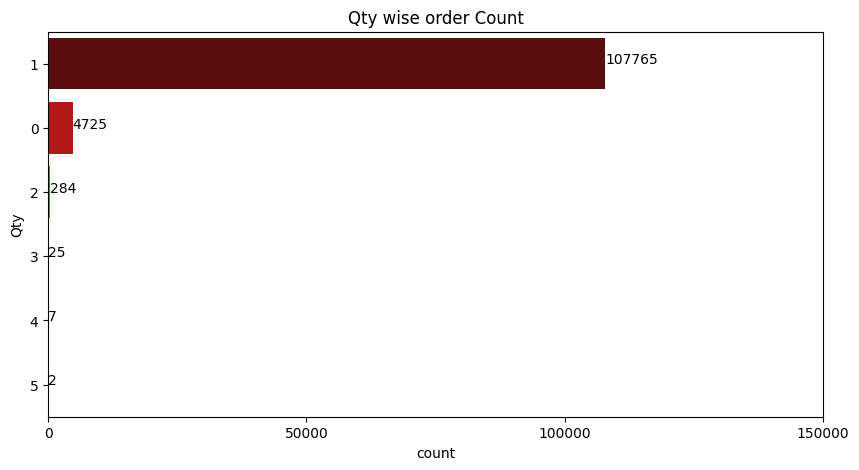

In [ ]:
order = final_df['Qty'].value_counts().index
plt.figure(figsize=(10,5))

ax = sns.countplot(data = final_df,
              y = 'Qty',
              palette = sns.color_palette('hot'),
              order = order)

for i,j in final_df['Qty'].value_counts().items():
  plt.annotate(text= j,xy =(j,i),xytext=(j,str(i)))

plt.title('Qty wise order Count')
plt.xticks(range(0,200000,50000))
plt.show()

In [ ]:
# Most user effectively order 1 qty in day to day product purchase

In [ ]:
final_df['Amount'].value_counts()

,count
Amount,
399.00,5107
771.00,2646
0.00,2340
735.00,2323
487.00,2068
...,...
708.58,1
829.52,1
719.05,1


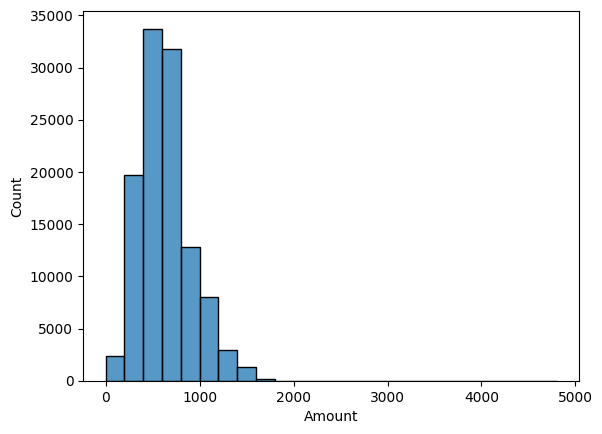

In [ ]:
sns.histplot(data = final_df ,x = 'Amount',bins = range(0,5000,200))
plt.show()

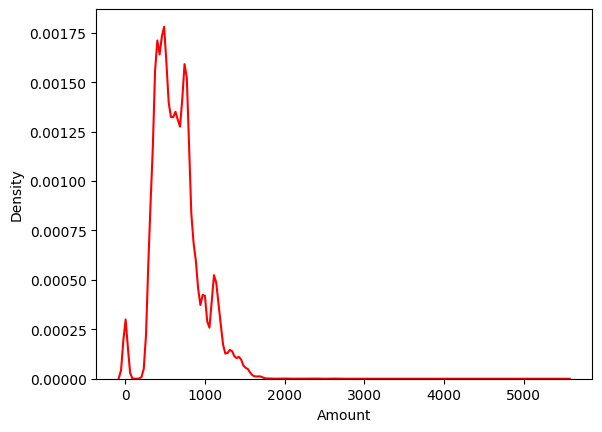

In [ ]:
sns.kdeplot(data = final_df ,x = 'Amount',color ='red')
plt.show()

In [ ]:
# maximum users bought product below Rs : 1296.5

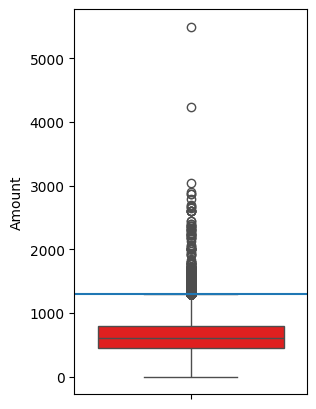

maximum users bought :1296.5


In [ ]:
q1 , q3 =final_df['Amount'].quantile([0.25,0.75])
iqr =q3 - q1
uc = q3 + 1.5 *iqr

plt.figure(figsize=(3,5))
sns.boxplot(data = final_df ,y = 'Amount',color ='red',orient = 'v')
plt.axhline(uc)
plt.show()

print(f'maximum users bought :{uc}')

In [ ]:
# Design and Drafted by :Data Analyst ALTAF HUSAIN

In [ ]:
final_df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

In [ ]:
x = final_df['ship-city'].value_counts().head(15).index
y = final_df['ship-city'].value_counts().head(15).values

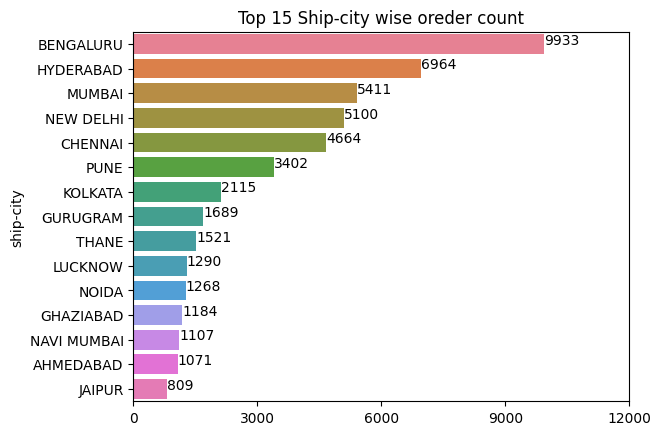

In [ ]:
sns.barplot(y = x ,x = y,hue = x,orient = 'h')

for i,j in final_df['ship-city'].value_counts().head(15).items():
  plt.annotate(text= j,xy =(j,i),xytext=(j,str(i)))

plt.title("Top 15 Ship-city wise oreder count")
plt.xticks(range(0,15000,3000))
plt.show()


In [ ]:
# In top 15 ship city south india dominate more with 3 different city order contribution by (Bengaluru, Hyderabad and chennai)

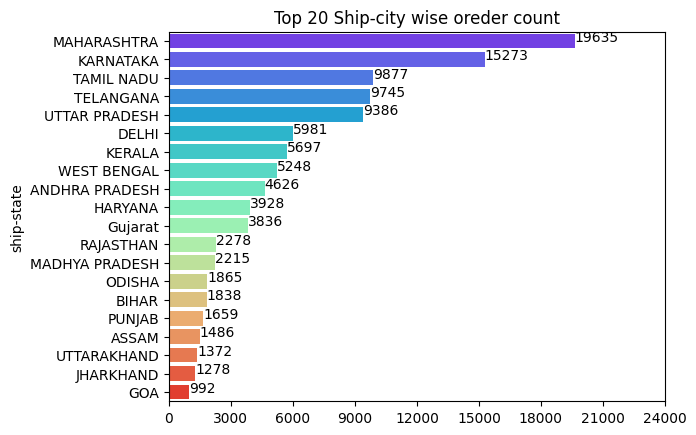

In [ ]:
x = final_df['ship-state'].value_counts().head(20).index
y = final_df['ship-state'].value_counts().head(20).values

sns.barplot(y = x ,x = y,hue = x,orient = 'h',palette=sns.color_palette('rainbow',20))

for i,j in final_df['ship-state'].value_counts().head(20).items():
  plt.annotate(text= j,xy =(j,i),xytext=(j,str(i)))

plt.title("Top 20 Ship-city wise oreder count")
plt.xticks(range(0,25000,3000))
plt.show()

In [ ]:
# In top 20 ship state west india and south india dominate more with 4 different city order contribution by (Bengaluru, Hyderabad and chennai,Maharastra)

In [ ]:
final_df['ship-postal-code'].value_counts()

,count
ship-postal-code,
201301.0,891
122001.0,614
560037.0,559
560068.0,550
560076.0,509
...,...
402108.0,1
534210.0,1
670306.0,1


In [ ]:
# All datasets belongs to Indian origin
final_df['ship-country'].value_counts()

,count
ship-country,
IN,112808


In [ ]:
final_df['B2B'].value_counts()

,count
B2B,
False,112040
True,768


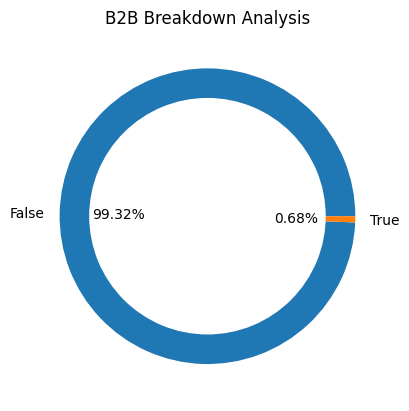

In [ ]:
final_df['B2B'].value_counts().plot(kind = 'pie',autopct = '%.2f%%')

plt.pie((1,),radius = 0.8,colors = 'w')
plt.title('B2B Breakdown Analysis')
plt.ylabel('')
plt.show()
# most are from b2c

In [ ]:
# Almost 99% orders are B2C which shows, more customer satisfaction and customer demands than B2B

In [ ]:
final_df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

# 7.2 :- Bivariate Analysis
### Design and Drafted by : Data Analyst ALTAF HUSAIN


In [ ]:
final_df['Date'].describe()

,Date
count,112808
mean,2022-05-12 12:04:00.493581824
min,2022-03-31 00:00:00
25%,2022-04-20 00:00:00
50%,2022-05-10 00:00:00
75%,2022-06-04 00:00:00
max,2022-06-29 00:00:00


In [ ]:
final_df['Date'].dt.month_name()

,Date
0,April
1,April
2,April
3,April
4,April
...,...
128971,May
128972,May
128973,May
128974,May


In [ ]:
grouped_df = final_df.groupby('Date')['Order ID'].count().sort_index().reset_index()
grouped_df['Month Name'] = grouped_df['Date'].dt.month_name()

In [ ]:
grouped_df

,Date,Order ID,Month Name
0,2022-03-31,150,March
1,2022-04-01,1265,April
2,2022-04-02,1358,April
3,2022-04-03,1470,April
4,2022-04-04,1292,April
...,...,...,...
86,2022-06-25,915,June
87,2022-06-26,1065,June
88,2022-06-27,986,June
89,2022-06-28,1058,June


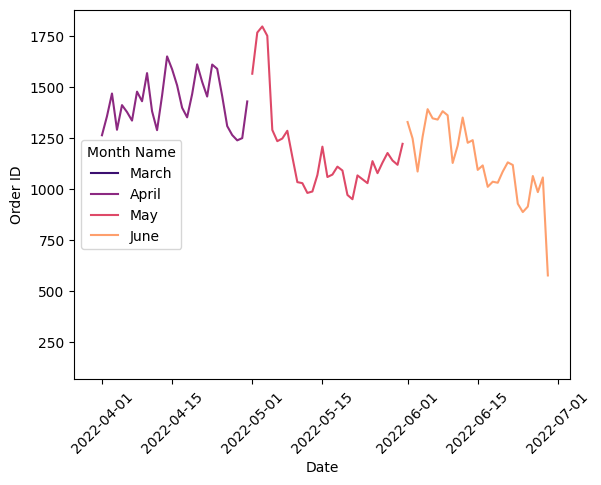

In [ ]:
ax = sns.lineplot(data = grouped_df,x ='Date',y = 'Order ID',
                  palette = sns.color_palette('magma',4),
                  hue = 'Month Name')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
grouped_df.groupby('Month Name')['Order ID'].sum().sort_values(ascending = False)

,Order ID
Month Name,
April,42852
May,36840
June,32966
March,150


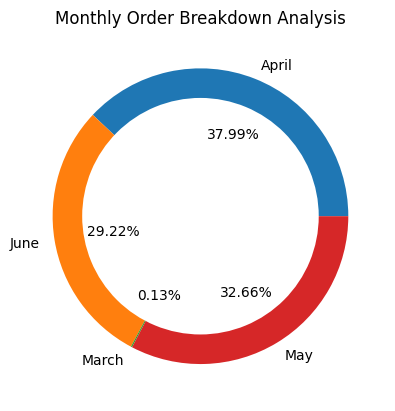

In [ ]:
grouped_df.groupby('Month Name')['Order ID'].sum().plot(kind = 'pie',autopct = '%.2f%%')

plt.pie((1,),radius = 0.8,colors = 'w')
plt.title('Monthly Order Breakdown Analysis')
plt.ylabel('')
plt.show()


In [ ]:
# April ,May, June each month approximate contribute 30% of total Revenue which shows fixed demand and  seasonality

In [ ]:
all_cols = list(final_df.columns)
all_cols.remove('Order ID')
all_cols.remove('Amount')
all_cols.remove('Qty')
all_cols.remove('ship-country')
all_cols.remove('ship-postal-code')
all_cols.remove('currency')
all_cols.remove('Sales Channel')

x_cols = all_cols
print(x_cols)


['Date', 'Status', 'Fulfilment', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'ship-city', 'ship-state', 'B2B']


In [ ]:
x_cols

['Date',
 'Status',
 'Fulfilment',
 'ship-service-level',
 'Category',
 'Size',
 'Courier Status',
 'ship-city',
 'ship-state',
 'B2B']

# Revenue Analysis by Diff Factors

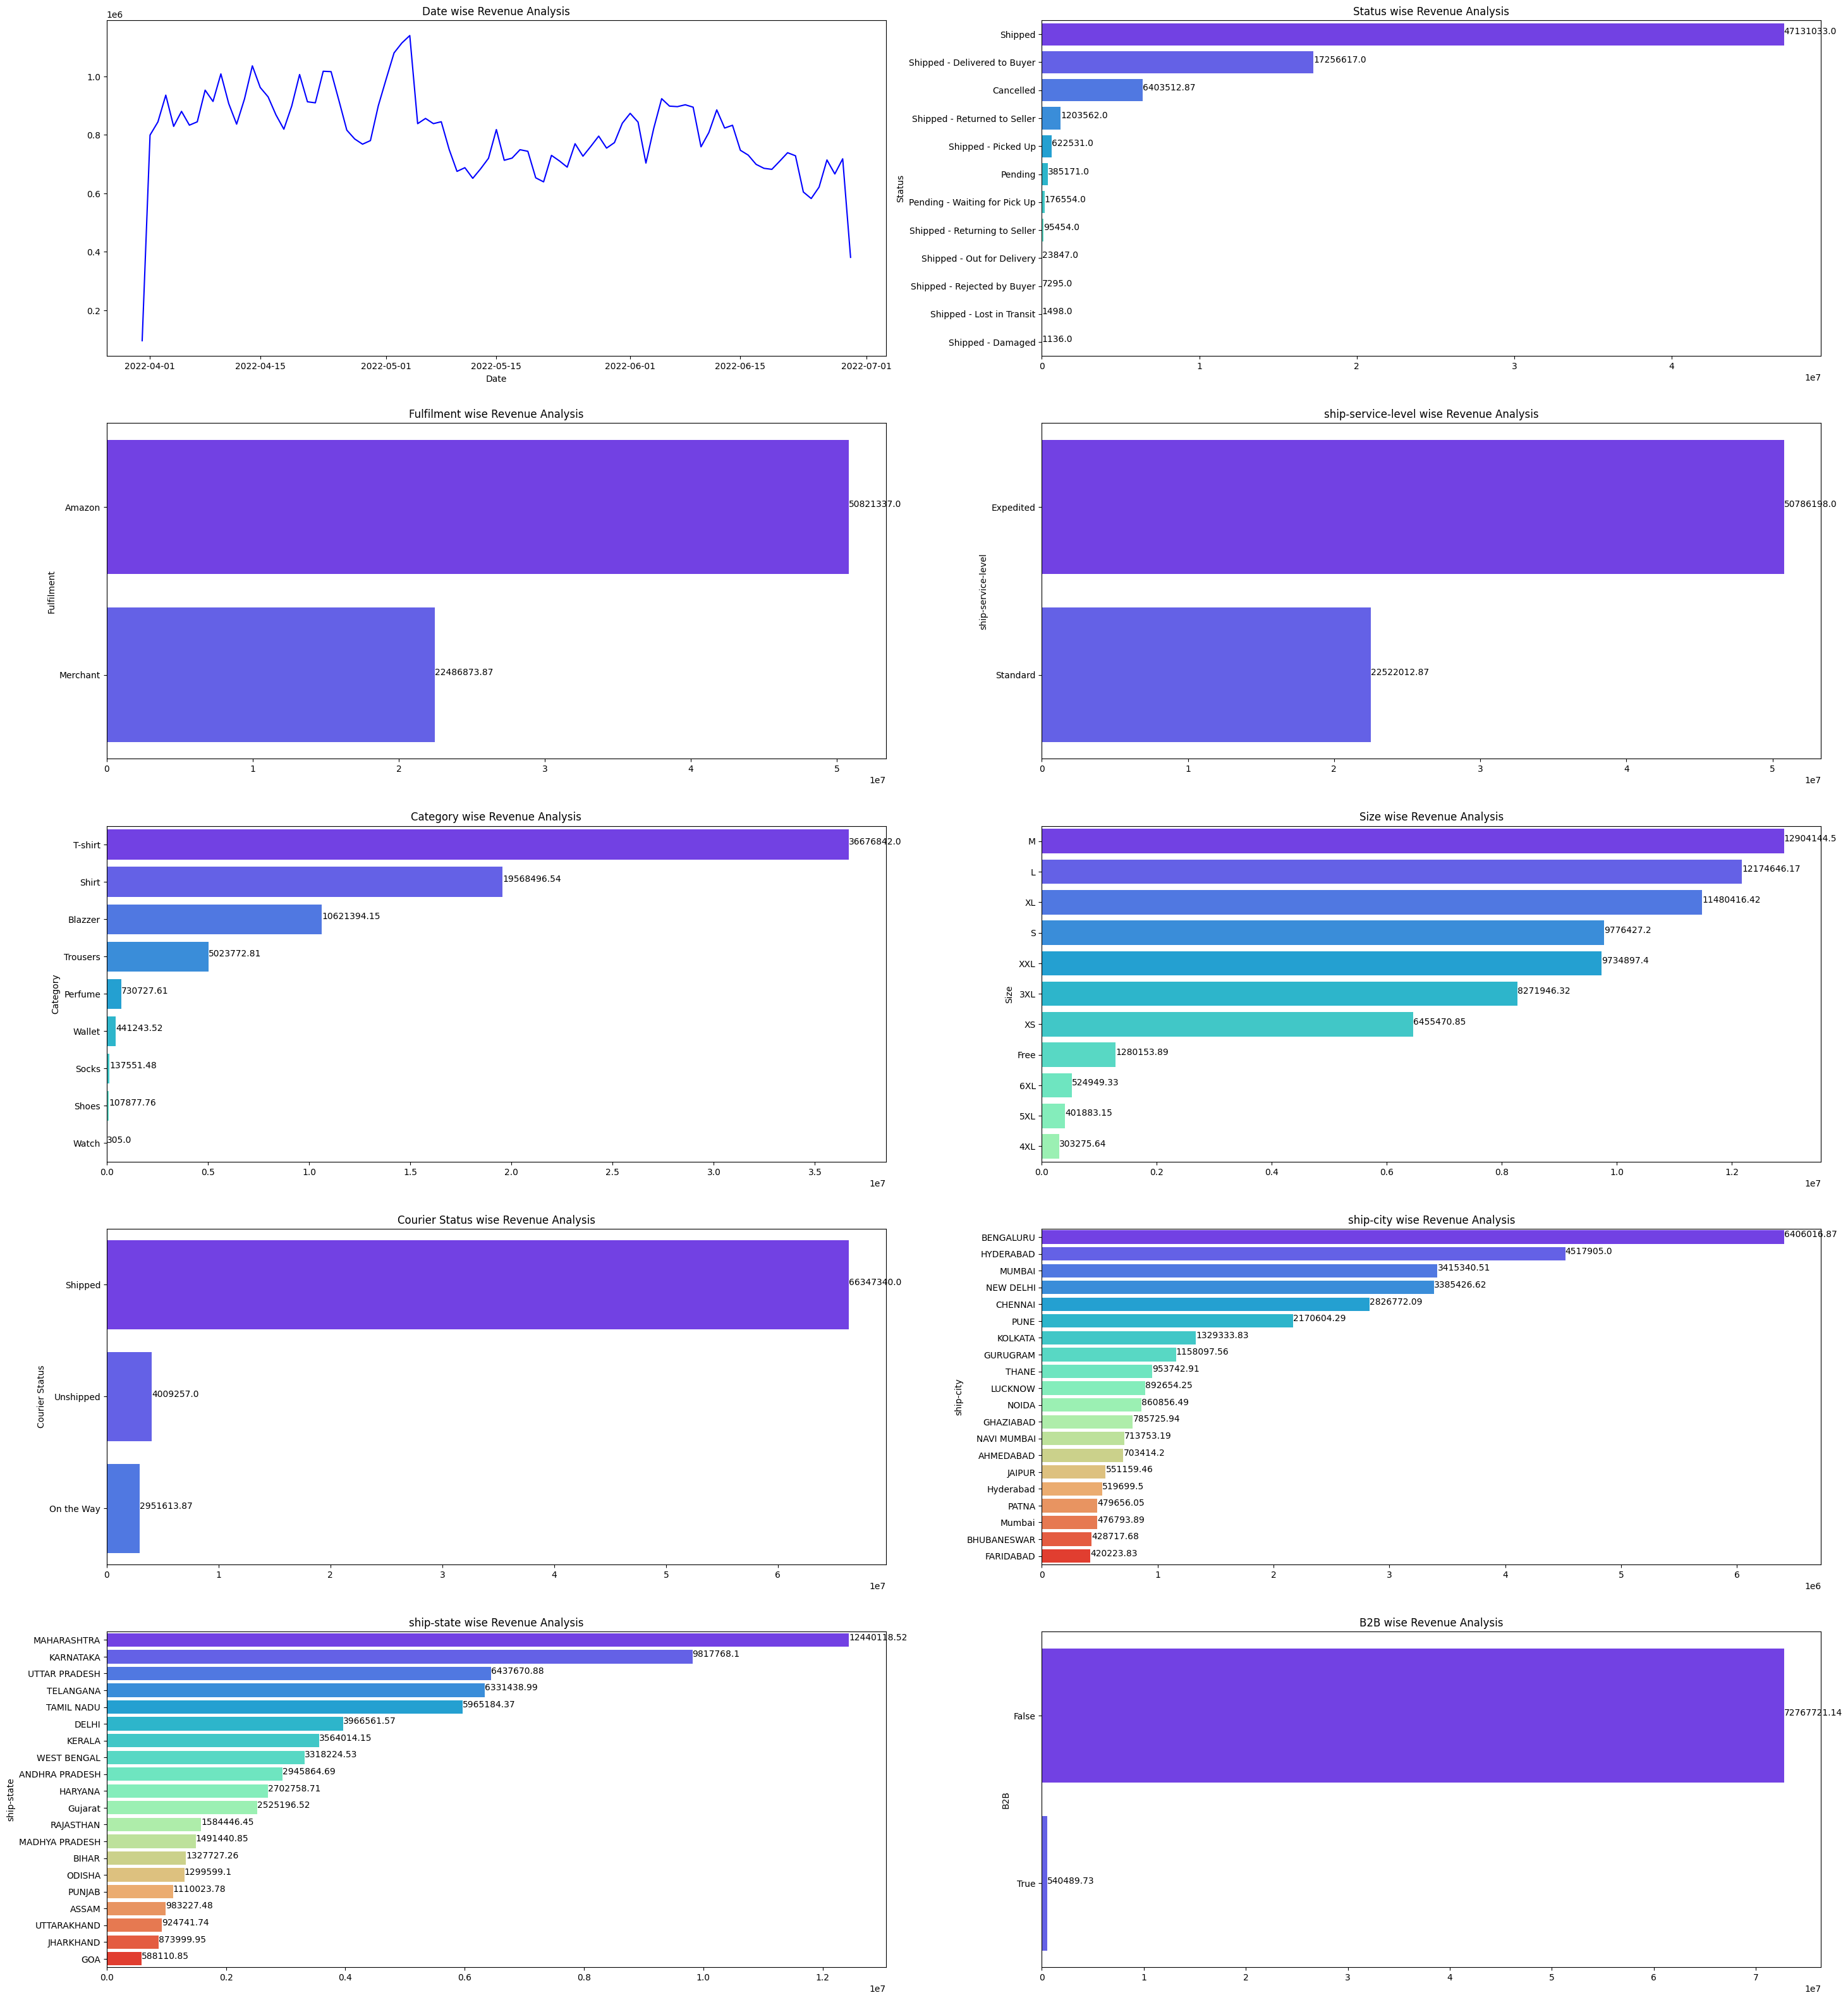

In [ ]:
n_rows = 5
n_cols = 2
plt.figure(figsize=(35, 40))

for i in range(n_rows * n_cols):
  try:
    plt.subplot(n_rows, n_cols, i + 1)

    x = final_df.groupby(x_cols[i])['Amount'].sum().sort_values(ascending=False).index
    y = final_df.groupby(x_cols[i])['Amount'].sum().sort_values(ascending=False).values

    if x_cols[i] == 'Date':
        sns.lineplot(x=x, y=y,color = 'blue')

    elif x_cols[i] in ['ship-city', 'ship-state']:
        x = final_df.groupby(x_cols[i])['Amount'].sum().sort_values(ascending=False).head(20).index
        y = final_df.groupby(x_cols[i])['Amount'].sum().sort_values(ascending=False).head(20).values
        sns.barplot(y=x, x=y, orient='h', palette=sns.color_palette('rainbow',20))

        for a, b in final_df.groupby(x_cols[i])['Amount'].sum().sort_values(ascending=False).head(20).items():
            plt.annotate(text=b, xy=(b, a), xytext=(b, str(a)))

    else:
        sns.barplot(y=x, x=y, orient='h', palette=sns.color_palette('rainbow',20))

        for a, b in final_df.groupby(x_cols[i])['Amount'].sum().sort_values(ascending=False).head(20).items():
            plt.annotate(text=b, xy=(b, a), xytext=(b, str(a)))

    plt.title(f'{x_cols[i]} wise Revenue Analysis')

  except:
    ...
plt.show()


In [ ]:
# The ship-state as (maharastra ,karanataka ,up,telenga, tamil nadu and delhi) has higer Revenue contribution among other states
# B2c Has higer revenue contribution than B2B
# The top 20 ship-city as south india , west india and new delhi has higer Revenue contribution among other city
#  the shipped as a courier has hiher revenue than other courier status
# the sise (M, L ,XL ,S ) has hihly deamnaded and also contribute high revenue than other sizes
# Category Tshirt,shirt,blezzar, contributeed hiher revenue than other category products
# Amazon has hiher revunue contribution than merchant as a filfilment
# The ship- services as expedited has contributed high revenue than standard
# status a s shipped has contributed high revenue than other status
# acoorf=ding to date the revenue get less in the may to june month


# Qty Analysis by Diff Factors

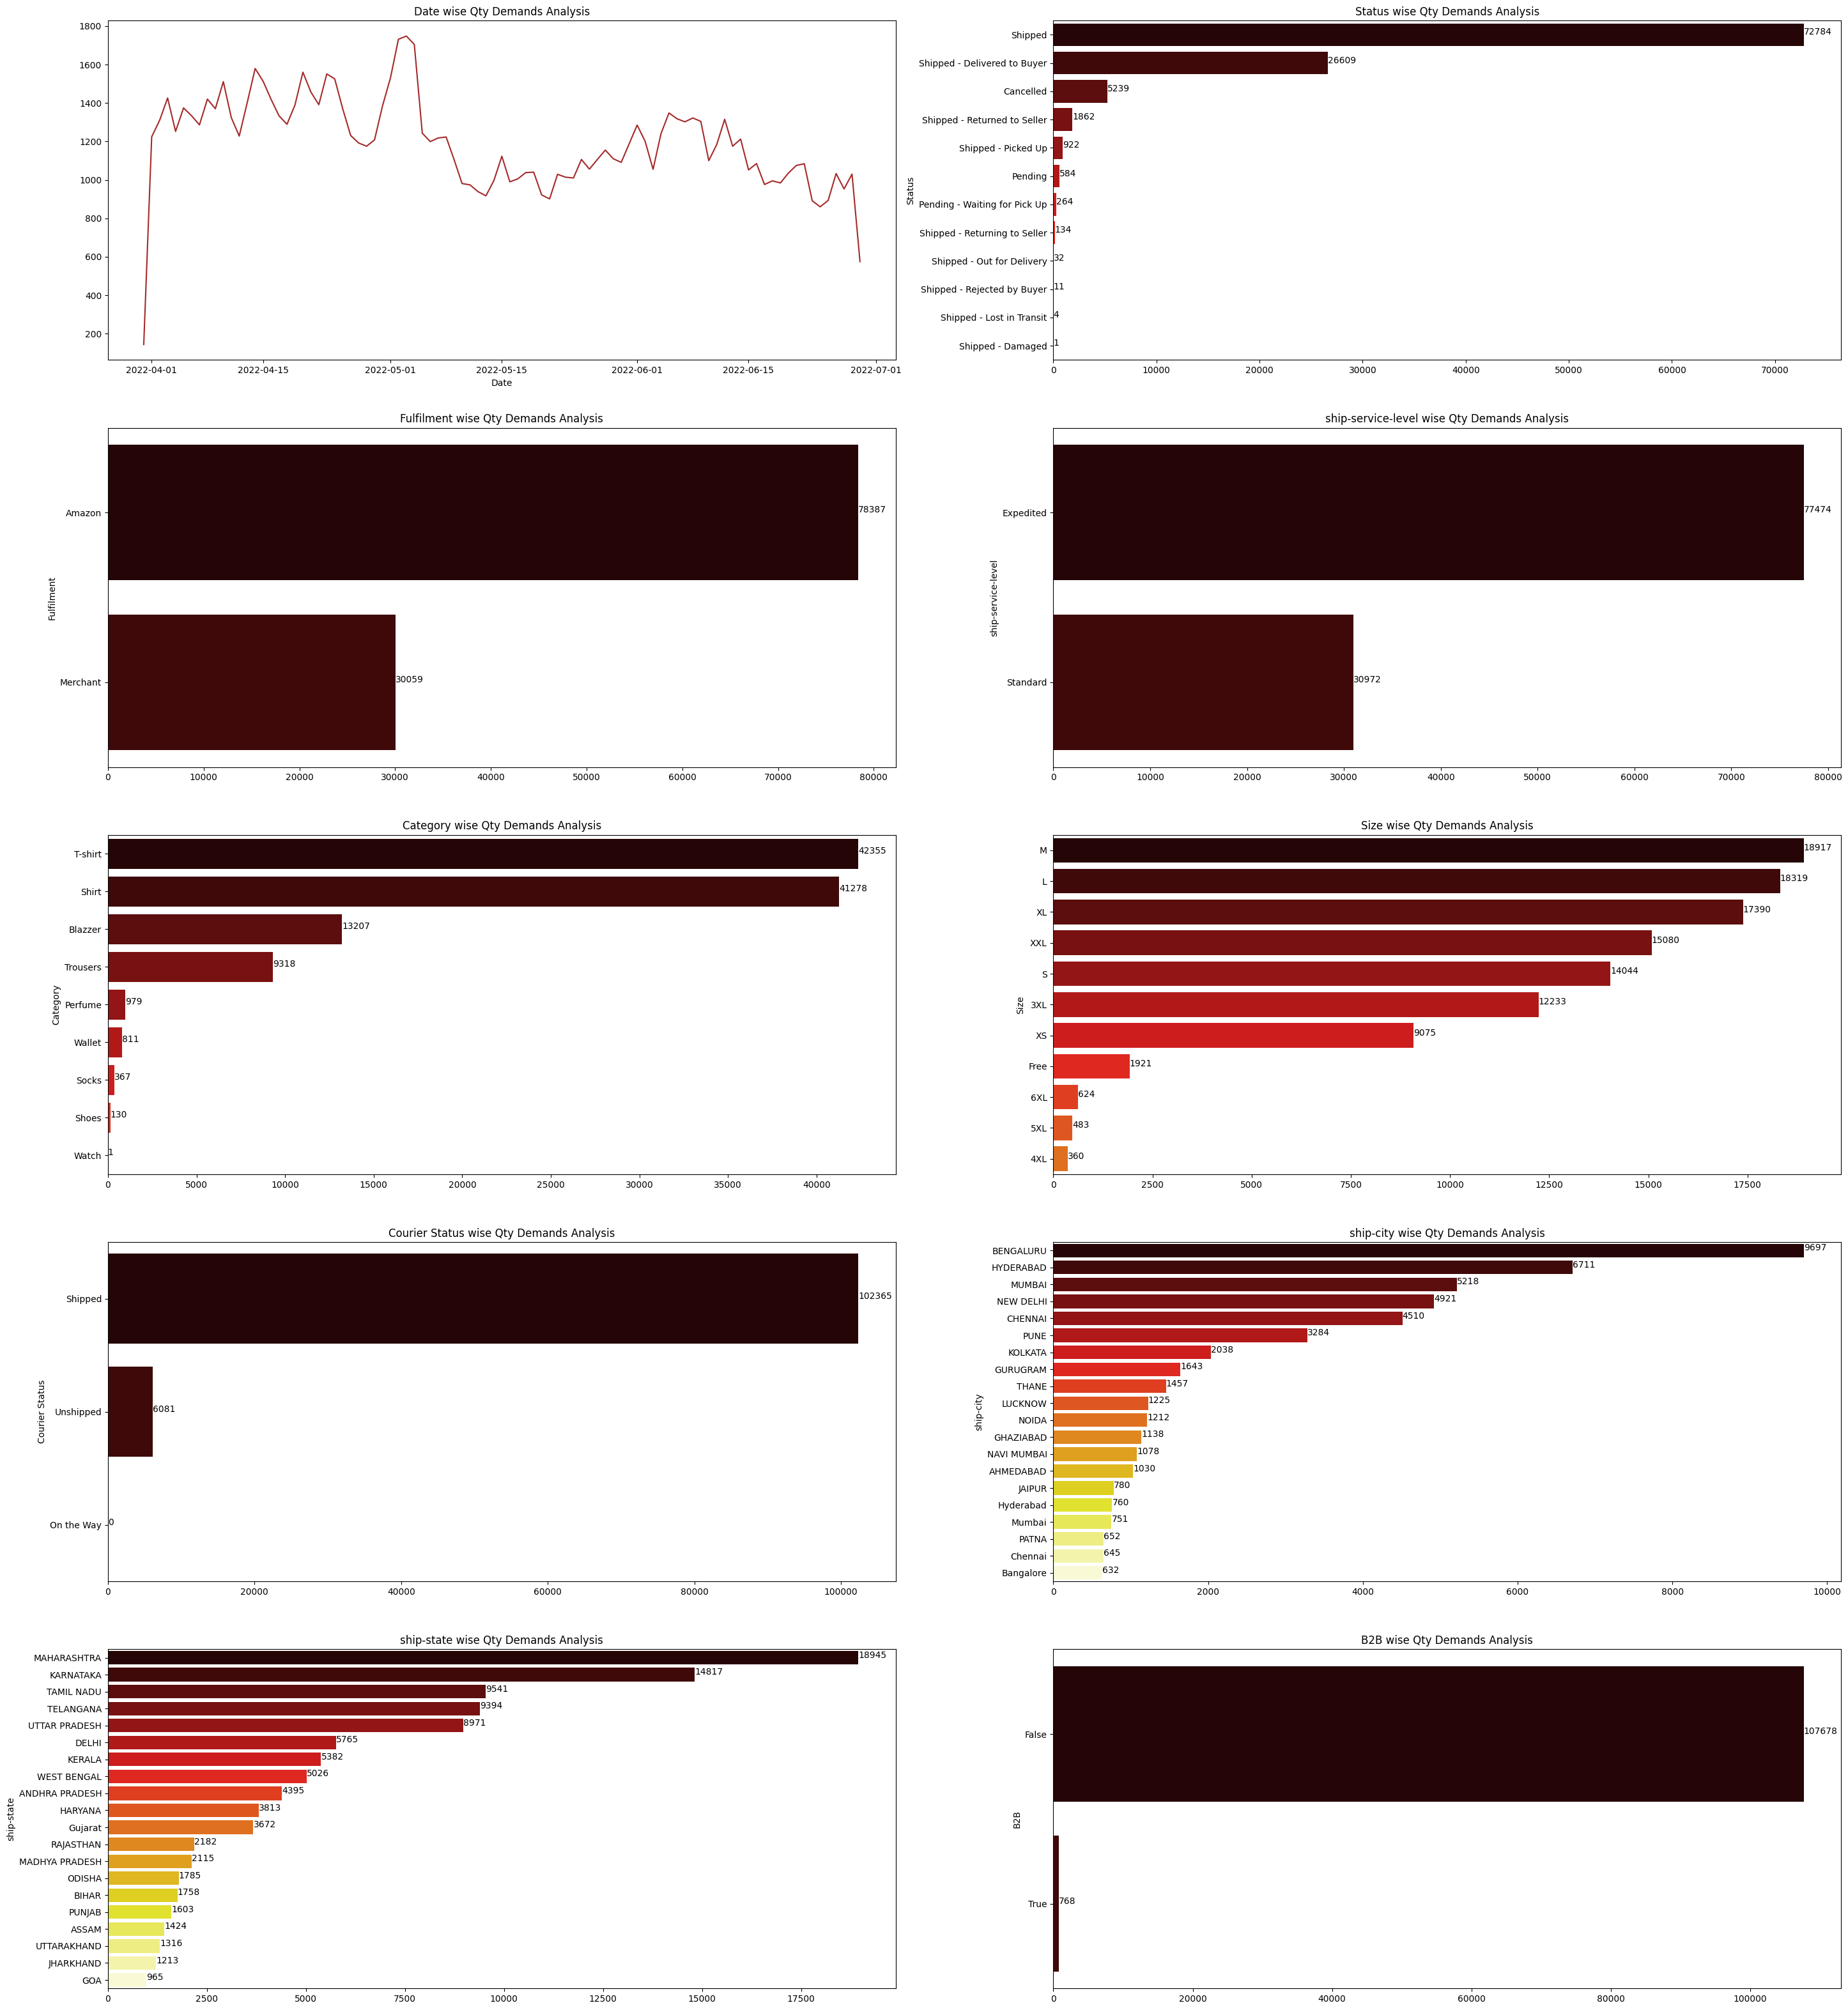

In [ ]:
n_rows = 5
n_cols = 2
plt.figure(figsize=(35, 40))

for i in range(n_rows * n_cols):
  try:
    plt.subplot(n_rows, n_cols, i + 1)

    x = final_df.groupby(x_cols[i])['Qty'].sum().sort_values(ascending=False).index
    y = final_df.groupby(x_cols[i])['Qty'].sum().sort_values(ascending=False).values

    if x_cols[i] == 'Date':
        sns.lineplot(x=x, y=y,color = 'brown')

    elif x_cols[i] in ['ship-city', 'ship-state']:
        x = final_df.groupby(x_cols[i])['Qty'].sum().sort_values(ascending=False).head(20).index
        y = final_df.groupby(x_cols[i])['Qty'].sum().sort_values(ascending=False).head(20).values
        sns.barplot(y=x, x=y, orient='h', palette=sns.color_palette('hot',20))

        for a, b in final_df.groupby(x_cols[i])['Qty'].sum().sort_values(ascending=False).head(20).items():
            plt.annotate(text=b, xy=(b, a), xytext=(b, str(a)))

    else:
        sns.barplot(y=x, x=y, orient='h', palette=sns.color_palette('hot',20))

        for a, b in final_df.groupby(x_cols[i])['Qty'].sum().sort_values(ascending=False).head(20).items():
            plt.annotate(text=b, xy=(b, a), xytext=(b, str(a)))

    plt.title(f'{x_cols[i]} wise Qty Demands Analysis')

  except:
    ...
plt.show()


In [ ]:
# The ship-state as (maharastra ,karanataka ,up,telenga, tamil nadu and delhi) has higer Qty wise contribution among other states
# B2c Has higer qty contribution than B2B
# The top 20 ship-city as south india  has higer qty contribution among other city
#  the shipped as a courier has hiher qty than other courier status
# the sise (M, L ,XL ,XXL ) has hihly deamnaded high qty than other sizes
# Category Tshirt,shirt,blezzar, contributeed hiher qty than other category products
# Amazon has hiher qty contribution than merchant as a filfilment
# The ship- services as expedited has contributed high in qty than standard
# status a s shipped has contributed high qty required  than other status
# acoorf=ding to date the qty get less in the may to june month

# 7.3 :- Multivariate Analysis

In [ ]:
final_df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

#### Date wise revenue for Different Ship-Service-level

In [ ]:
final_df['ship-service-level'].unique()

array(['Standard', 'Expedited'], dtype=object)

In [ ]:
final_df['Month_name'] = final_df['Date'].dt.month_name()

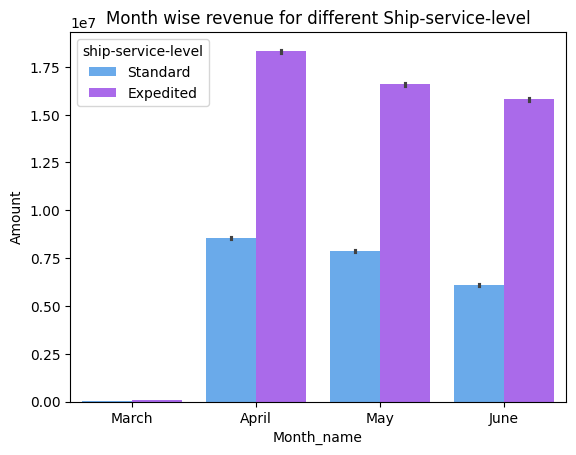

In [ ]:
order = ['March','April','May','June']

sns.barplot(data = final_df , x = 'Month_name',y = 'Amount',hue = 'ship-service-level',
            estimator = 'sum' ,order = order,palette=sns.color_palette('cool',2))

plt.title('Month wise revenue for different Ship-service-level')
plt.show()

In [ ]:
#  The April month havr higher revenue in ship service level in as expedited

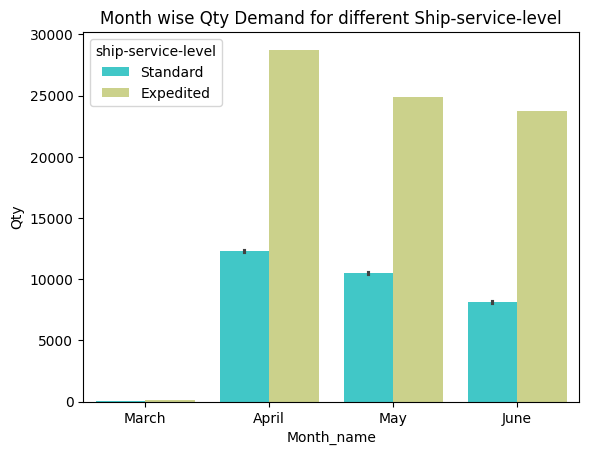

In [ ]:
order = ['March','April','May','June']

sns.barplot(data = final_df , x = 'Month_name',y = 'Qty',hue = 'ship-service-level',
            estimator = 'sum' ,order = order,palette=sns.color_palette('rainbow',2))

plt.title('Month wise Qty Demand for different Ship-service-level')
plt.show()

In [ ]:
#  The April month havr higher qty in ship service level in as expedited

In [ ]:
final_df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'Month_name'],
      dtype='object')

# Numerical Analysis

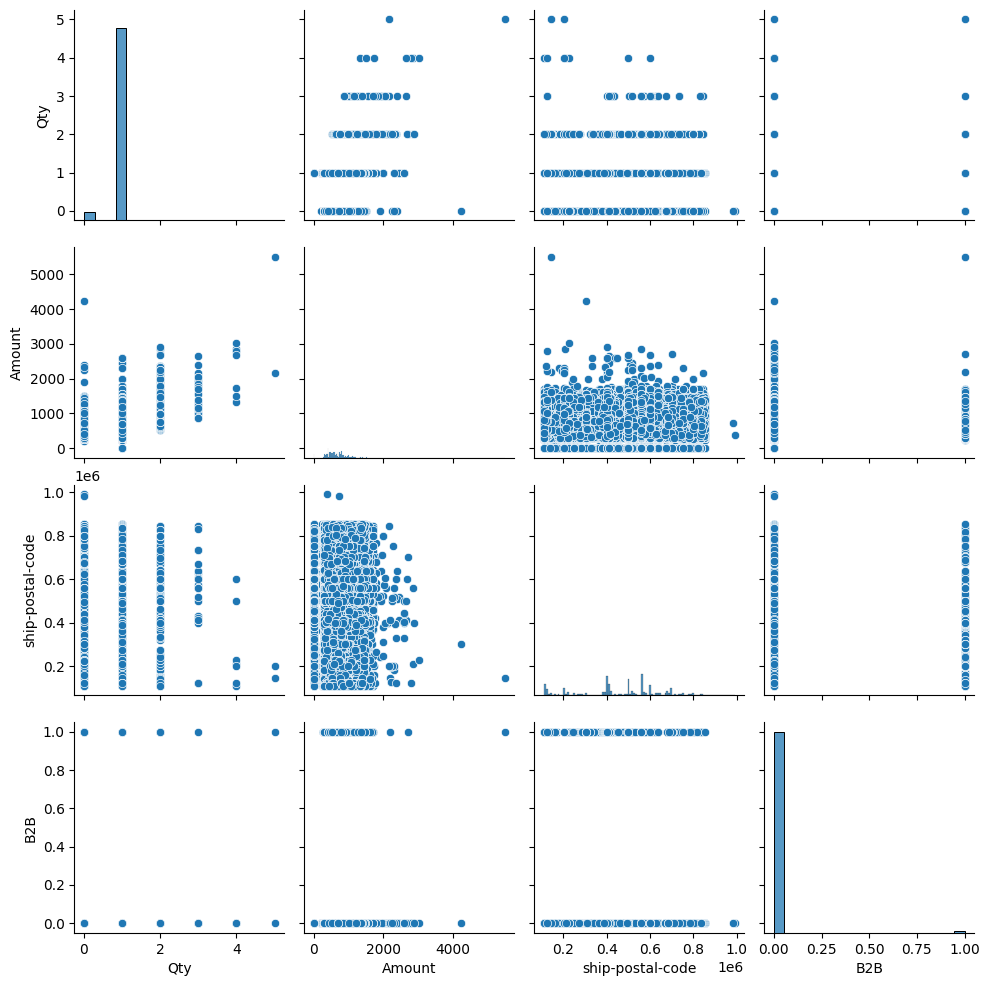

In [ ]:
sns.pairplot(final_df)
plt.show()

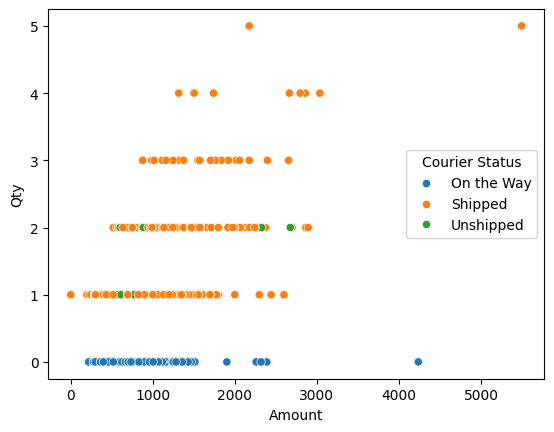

In [ ]:
sns.scatterplot(data = final_df,x = 'Amount' ,y = 'Qty', hue = 'Courier Status')
plt.show()

In [ ]:
#  The mostly oder are alomst under the Rs 2000 in every qty as courier status in shipped

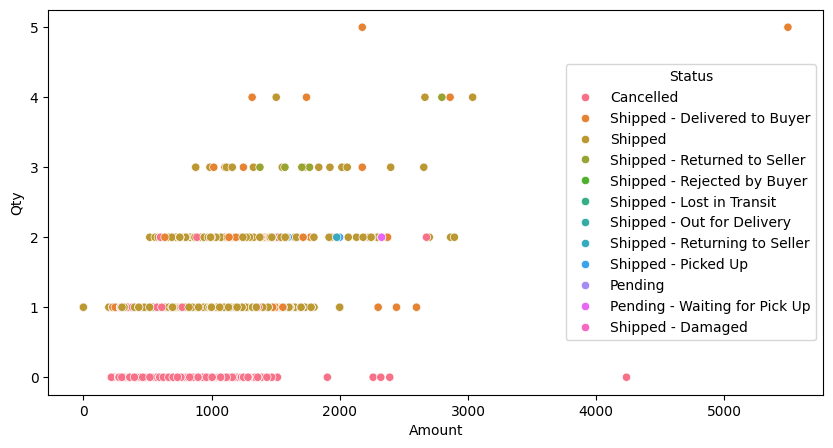

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = final_df,x = 'Amount' ,y = 'Qty', hue = 'Status')
plt.show()

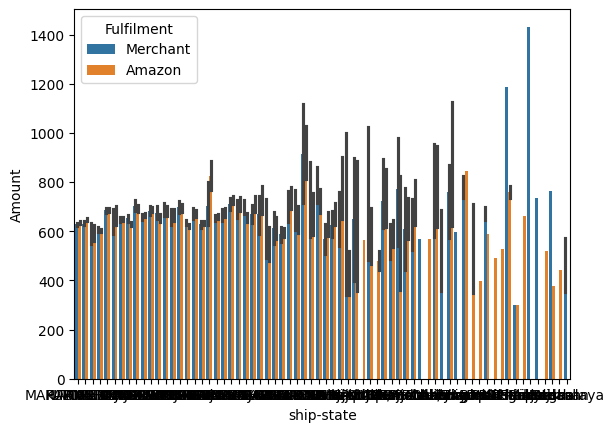

In [ ]:
sns.barplot(data = final_df,x = 'ship-state',y = 'Amount',hue = 'Fulfilment')
plt.show()

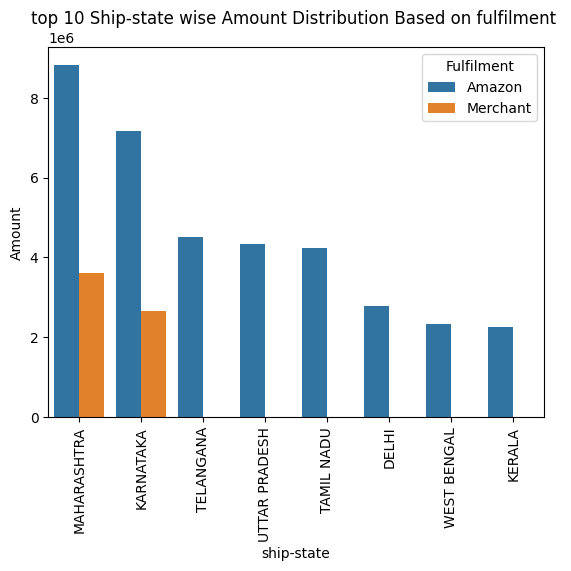

In [ ]:
top_10_state = final_df.groupby(['ship-state','Fulfilment'])['Amount'].sum().sort_values(ascending = False).head(10).reset_index()

sns.barplot(data = top_10_state,x = 'ship-state',y = 'Amount',hue = 'Fulfilment')

plt.title('top 10 Ship-state wise Amount Distribution Based on fulfilment ')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#  top 10 ship state in which  maharastra has high revenue than other state and in also a amazon fulfilment

In [ ]:
final_df['Date'].describe()

,Date
count,112808
mean,2022-05-12 12:04:00.493581824
min,2022-03-31 00:00:00
25%,2022-04-20 00:00:00
50%,2022-05-10 00:00:00
75%,2022-06-04 00:00:00
max,2022-06-29 00:00:00


In [ ]:
final_df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'Month_name'],
      dtype='object')

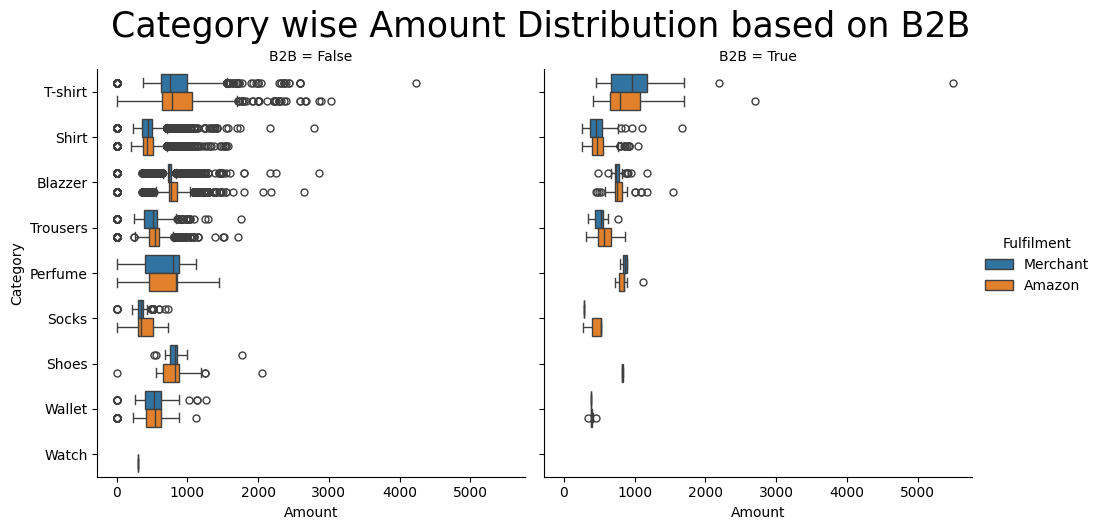

In [ ]:
ax = sns.catplot(final_df,y = 'Category',x = 'Amount',col= 'B2B',kind='box',hue = 'Fulfilment',orient='h',sharex = True)
ax.fig.suptitle('Category wise Amount Distribution based on B2B',y = 1.05,fontsize = 25)
#  plt.xticks(rotation = 45)
plt.show()
# Remarks: B2B has less outliers amount variations compare to B2C ("on consumer side ,Rtailers/ or Merchant can control price more Effictivily")

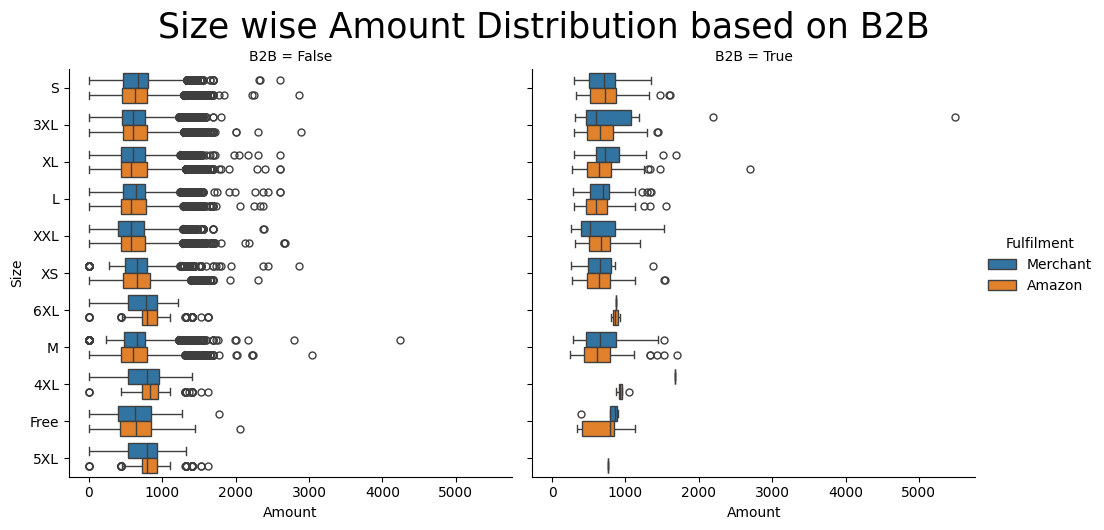

In [ ]:
ax = sns.catplot(final_df,y = 'Size',x = 'Amount',col= 'B2B',kind='box',hue = 'Fulfilment',orient='h',sharex = True)
ax.fig.suptitle('Size wise Amount Distribution based on B2B',y = 1.05,fontsize = 25)
#  plt.xticks(rotation = 45)
plt.show()
# Remarks: B2B has less outliers qty variations compare to B2C ("on consumer side ,Rtailers/ or Merchant can control qty more Effictivily")

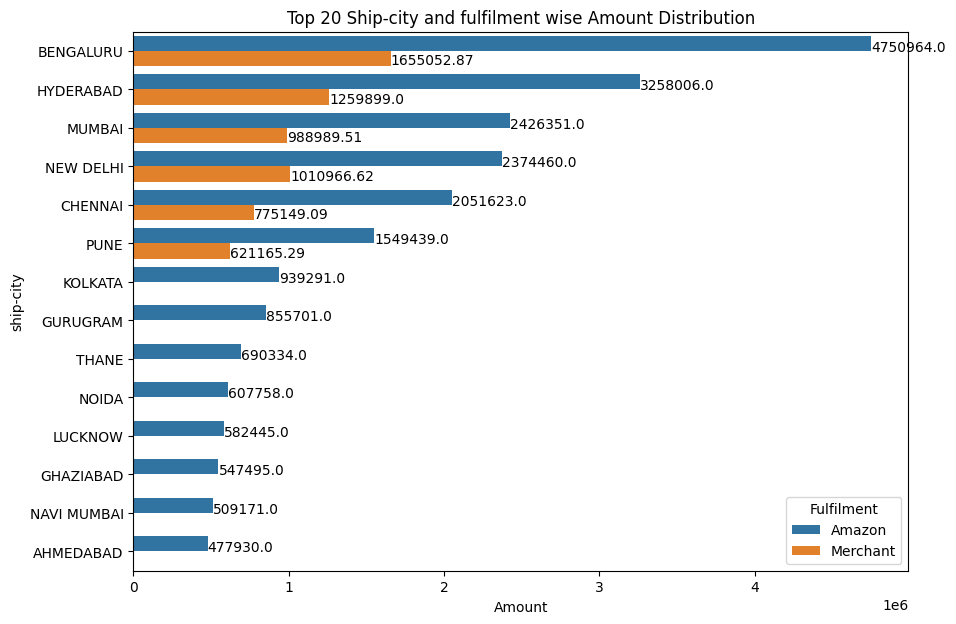

In [ ]:
plt.figure(figsize=(10,7))
top_20_city = final_df.groupby(['ship-city','Fulfilment'])['Amount'].sum().sort_values(ascending = False).head(20).reset_index()
sns.barplot(data = top_20_city,y = 'ship-city',x = 'Amount',hue = 'Fulfilment',orient = 'h')

emp_list = []
for m,n in enumerate(top_20_city['ship-city'].unique()):
  emp_list.extend([n,m])
# print(emp_list)

temp_df = top_20_city[['ship-city','Amount']]

for tup in temp_df.itertuples():
  _,i,j = tuple(tup)

  if top_20_city[top_20_city['Amount'] == j]['Fulfilment'].values[0] == 'Amazon':
      plt.annotate(text= j, xy=(j, i), xytext=(j, str(i)))
  else:
    plt.annotate(text= j, xy=(j, i), xytext=(j, emp_list[emp_list.index(i)+1]+ .35))
    # print(emp_list[emp_list.index(i)+1])

# plt.yticks(np.linspace(0,len(top_20_city['ship-city'].unique()),2 * len(top_20_city['ship-city'].unique())),emp_list)
plt.title('Top 20 Ship-city and fulfilment wise Amount Distribution')
plt.show()

In [ ]:
# Bengluru ,Hyderabad, Mumbai, New delhi, chennai, pune cities have two differnet fulfiment, Amazon and Merchant
# cities only followed by amazon as a fulfilment
# Amazon fulfilment revenue are on higer side compare to merchant

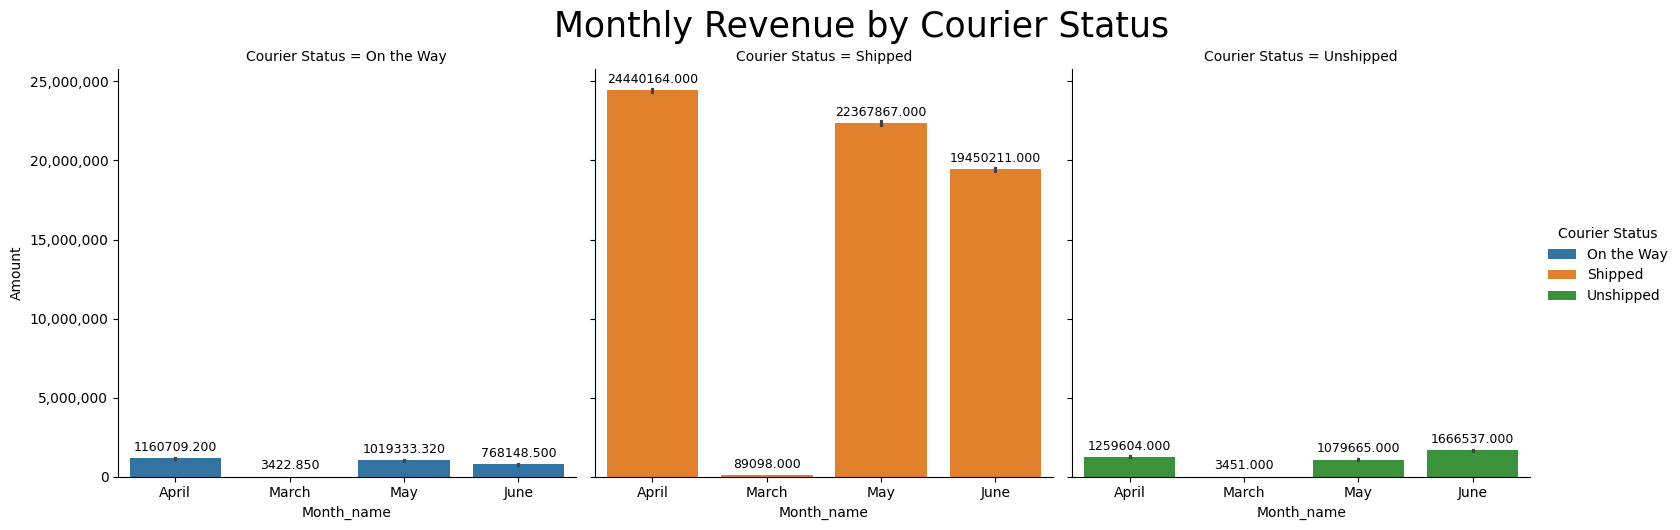

In [ ]:
# ax = sns.catplot(final_df,x = 'Month_name',y = 'Amount',hue = 'Courier Status',col = 'Courier Status',kind = 'bar',row = 'Qty')
ax = sns.catplot(final_df,x = 'Month_name',y = 'Amount',hue = 'Courier Status',col = 'Courier Status',kind = 'bar',estimator='sum')

for axs in ax.axes.flat:
      axs.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Removes scientific notation

      for container in axs.containers:
              axs.bar_label(container, fmt='%.3f', label_type='edge', fontsize=9, padding=3)

ax.fig.suptitle('Monthly Revenue by Courier Status',y = 1.05,fontsize = 25)
plt.show()

In [ ]:
#  Monthy revenue as a courier status in the shipped has higer revenue collections in also the april , may month

# Final Key Takeaways Outcomes

# 📌 Final Report Key Takeaways

- 'Shipped' status has the highest number of orders compared to other shipment statuses.
- Amazon contributes approximately **70%** of the total fulfillment demand, while merchants contribute around **30%**.
- 'Expedited' shipping accounts for approximately **69%** of all ship-service levels, compared to **31%** for 'Standard', indicating higher demand for premium services.
- Product categories like **T-shirt, Shirt, and Blazer** have significantly higher order counts than other product categories.
- Sizes **M, L, XL, and XXL** are in higher demand compared to other clothing sizes.
- About **90%** of the orders are in 'Shipped' status, indicating a **logistics success rate of 90%**.
- Most users typically order **1 quantity** per product in day-to-day purchases.
- A majority of customers purchased products priced **below ₹1296.50**.
- Among the **top 15 shipping cities**, **South India dominates**, with significant contributions from **Bengaluru, Hyderabad, and Chennai**.
- Among the **top 20 shipping states**, **South and West India dominate**, with major contributions from **Bengaluru, Hyderabad, Chennai, and Maharashtra**.
- Approximately **99%** of the orders are **B2C**, indicating stronger customer demand and satisfaction compared to B2B.
- The months of **April, May, and June** each contribute around **30%** of total revenue, highlighting consistent seasonal demand.

# 📊 Bivariate Analysis – Amount by

- States like **Maharashtra, Karnataka, Uttar Pradesh, Telangana, Tamil Nadu, and Delhi** have higher revenue contributions than other states.
- **B2C** orders contribute more revenue than **B2B** orders.
- Among the **top 20 shipping cities**, **South India, West India, and New Delhi** show higher revenue contributions.
- The **'Shipped'** courier status contributes more revenue than other courier statuses.
- Sizes **M, L, XL, and S** are highly demanded and contribute significantly to revenue.
- Product categories such as **T-shirt, Shirt, and Blazer** contribute more revenue than other product categories.
- **Amazon fulfillment** contributes more revenue than **merchant fulfillment**.
- The **Expedited** shipping service generates higher revenue compared to **Standard**.
- Orders with the status **'Shipped'** contribute more revenue than those with other statuses.
- Revenue appears to **decline slightly in May and June**.

# 📦 Bivariate Analysis – Qty by

- States like **Maharashtra, Karnataka, Uttar Pradesh, Telangana, Tamil Nadu, and Delhi** contribute more in terms of order quantity.
- **B2C** orders have higher quantity contributions than **B2B**.
- Among the **top 20 shipping cities**, **South India** dominates in terms of quantity ordered.
- The **'Shipped'** courier status has the highest quantity compared to other statuses.
- Sizes **M, L, XL, and XXL** are the most in-demand in terms of quantity.
- Categories like **T-shirt, Shirt, and Blazer** contribute the most to total quantities sold.
- **Amazon fulfillment** contributes more in terms of quantity than **merchant fulfillment**.
- The **Expedited** shipping service results in higher quantities than **Standard**.
- The **'Shipped'** status is associated with the highest quantity of orders.
- Quantity slightly **declines in May and June**.

# 📈 Multivariate Analysis Remarks

- In **April**, the **Expedited** shipping service shows the highest revenue.
- In **April**, the **Expedited** shipping service also has the highest quantity of orders.
- Most orders fall **under ₹2000**, regardless of quantity, particularly with the **'Shipped'** courier status.
- Among the **top 10 shipping states**, **Maharashtra** has the highest revenue and is primarily **Amazon-fulfilled**.
- **B2B** orders show **less variation (fewer outliers)** in order amounts compared to **B2C**, suggesting that merchants/retailers control pricing more effectively.
- Similarly, **B2B** orders show **less variation in quantity**, suggesting more stable purchasing behavior among merchants.
- Cities like **Bengaluru, Hyderabad, Mumbai, New Delhi, Chennai, and Pune** use both **Amazon** and **Merchant** fulfillment methods.
- In these cities, **Amazon-fulfilled orders** generate **higher revenue** than merchant-fulfilled orders.
- **Monthly revenue** from **'Shipped'** status orders is highest in **April and May**.



## Design and Drafted by : **Data Analyst ALTAF HUSAIN**